In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
# Upload the dataset file from your local machine
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [3]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))  # This automatically picks the uploaded file
print(df.head())  # Check the first few rows of your dataset


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [6]:
# Select relevant columns (modify these based on your dataset)
df = df[['rating', 'duration', 'release_year']]  # Adjust according to your dataset

# Handle missing values by dropping rows with NaN
df.dropna(inplace=True)

# Convert 'rating' column to numerical values using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['rating'] = le.fit_transform(df['rating'])

# Convert 'duration' to numeric
def convert_duration(duration):
    # If the duration is a movie (contains 'min')
    if 'min' in duration:
        return float(duration.replace(' min', ''))
    # If the duration is a TV show (contains 'Seasons')
    elif 'Seasons' in duration:
        return float(duration.split(' ')[0])  # Extract number of seasons
    else:
        return np.nan  # Handle cases where duration is non-numeric (NaN)

# Apply the conversion function to 'duration' column
df['duration'] = df['duration'].apply(convert_duration)

# Handle any non-numeric values in 'duration' by dropping rows with NaN
df.dropna(subset=['duration'], inplace=True)

# Standardize the data (normalize the features)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

print(scaled_data[:5])  # Check the scaled data


[[-1.40040679  0.06131469  0.68783033]
 [ 0.57841508 -2.06057349  0.79470958]
 [ 0.57841508 -2.06057349  0.79470958]
 [-1.89511226  0.08542706  0.79470958]
 [ 0.57841508  0.9052475  -2.19790968]]


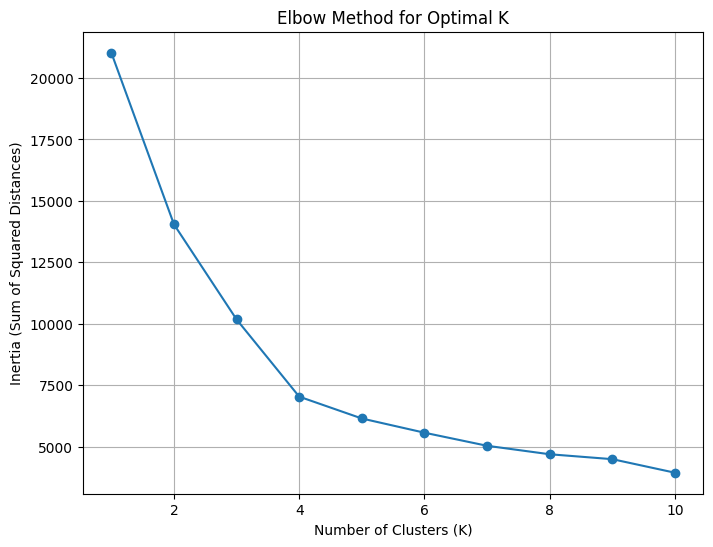

   rating  duration  release_year  cluster  Cluster
0       4      90.0          2020        4        1
1       8       2.0          2021        2        2
4       8       2.0          2021        2        2
6       3      91.0          2021        4        1
7       8     125.0          1993        1        3


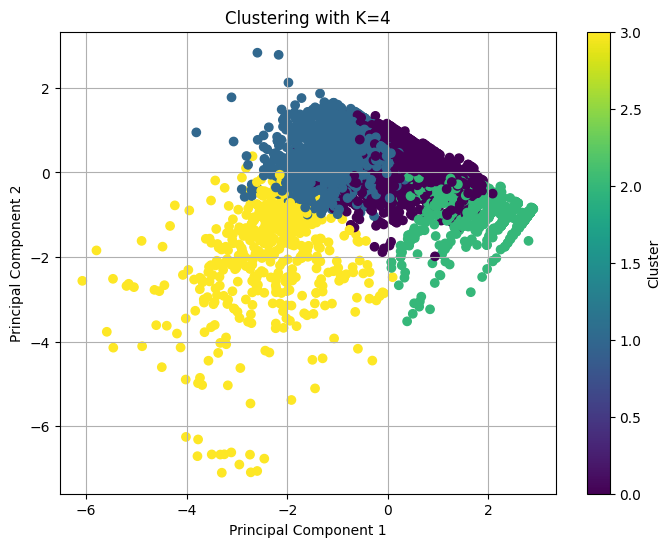

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Elbow Method to Find Optimal Number of Clusters (K)

# Calculate the inertia (sum of squared distances) for a range of k values
inertia = []
k_range = range(1, 11)  # Trying k values from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  # Assuming 'scaled_data' is your preprocessed data
    inertia.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

# Step 2: Apply KMeans Clustering with the Optimal K (Choose the value of K based on the elbow plot)

optimal_k = 4  # Replace with the optimal K from your elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Step 3: Add the Cluster Labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Step 4: Display the DataFrame with Cluster Labels
print(df.head())

# Optional: Visualize the clusters (if data is high-dimensional, reduce it to 2D using PCA)
from sklearn.decomposition import PCA

# Reduce the data to 2D for visualization (optional)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f'Clustering with K={optimal_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [7]:
# Perform K-means clustering
k = 5  # Number of clusters, you can adjust this
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Print the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[ 0.72559233  0.21827185  0.32591787]
 [-1.08443794  0.70856368 -1.20822798]
 [ 0.73409452 -1.81129833  0.35791421]
 [-0.42676336  0.58160383 -3.90073899]
 [-0.83984477  0.42045402  0.26812666]]


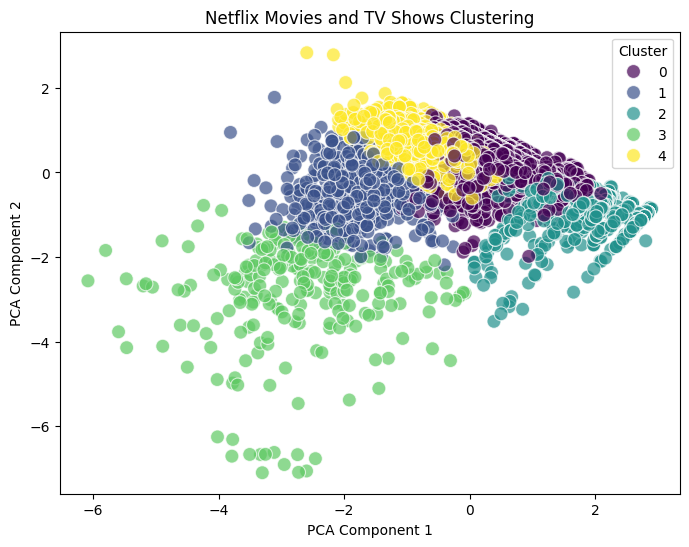

In [8]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plotting the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df['cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Netflix Movies and TV Shows Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [9]:
# Show the data for each cluster
for i in range(k):
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i].head())  # View the top rows of each cluster



Cluster 0:
    rating  duration  release_year  cluster
12       8     127.0          2021        0
13       9      91.0          2021        0
16       8      67.0          2020        0
23      10      61.0          2021        0
35       8     110.0          2021        0

Cluster 1:
    rating  duration  release_year  cluster
7        8     125.0          1993        1
22       9     161.0          1996        1
24       6     166.0          1998        1
26       9     147.0          1997        1
48       5     122.0          2001        1

Cluster 2:
    rating  duration  release_year  cluster
1        8       2.0          2021        2
4        8       2.0          2021        2
8        6       9.0          2021        2
15       8       4.0          2021        2
17       8       2.0          2020        2

Cluster 3:
     rating  duration  release_year  cluster
41        3     124.0          1975        3
42        3     116.0          1978        3
43        3      98.0    